## Data and Imports

In [1]:
# Download the dataset
!wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

# Create a directory and extract the dataset
!mkdir speech_commands && tar -xvzf speech_commands_v0.01.tar.gz -C speech_commands

Streaming output truncated to the last 5000 lines.
./up/6f9088d7_nohash_0.wav
./up/6f342826_nohash_0.wav
./up/e0a7c5a0_nohash_0.wav
./up/4d4e17f5_nohash_1.wav
./up/b0f24c9b_nohash_0.wav
./up/735845ab_nohash_2.wav
./up/53d5b86f_nohash_0.wav
./up/1a5b9ca4_nohash_1.wav
./up/23abe1c9_nohash_2.wav
./up/bdee441c_nohash_1.wav
./up/a1cff772_nohash_1.wav
./up/1ecfb537_nohash_3.wav
./up/37fc5d97_nohash_3.wav
./up/bd8412df_nohash_1.wav
./up/e53139ad_nohash_1.wav
./up/10ace7eb_nohash_3.wav
./up/30065f33_nohash_0.wav
./up/eefd26f3_nohash_0.wav
./up/c9b653a0_nohash_2.wav
./up/02746d24_nohash_0.wav
./up/e1469561_nohash_0.wav
./up/4bba14ce_nohash_0.wav
./up/b5d1e505_nohash_1.wav
./up/531a5b8a_nohash_1.wav
./up/0135f3f2_nohash_0.wav
./up/dbb40d24_nohash_4.wav
./up/e9287461_nohash_1.wav
./up/71e6ab20_nohash_0.wav
./up/ead2934a_nohash_1.wav
./up/f9af0887_nohash_0.wav
./up/ff63ab0b_nohash_0.wav
./up/f3d06008_nohash_0.wav
./up/918a2473_nohash_4.wav
./up/e54a0f16_nohash_0.wav
./up/cb8f8307_nohash_1.wav
./up

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd
import tqdm.notebook as tqdm
from collections import Counter
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import pandas as pd
from collections import Counter
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
import os
# Path to dataset
data_path = "speech_commands"

# Count number of audio files
num_files = sum([len(files) for _, _, files in os.walk(data_path)])

print("Total number of rows (audio files):", num_files)

Total number of rows (audio files): 64732


In [4]:
print(len(data_path))
print(num_files)

15
64732


## EDA

  0%|          | 0/1000 [00:00<?, ?it/s]

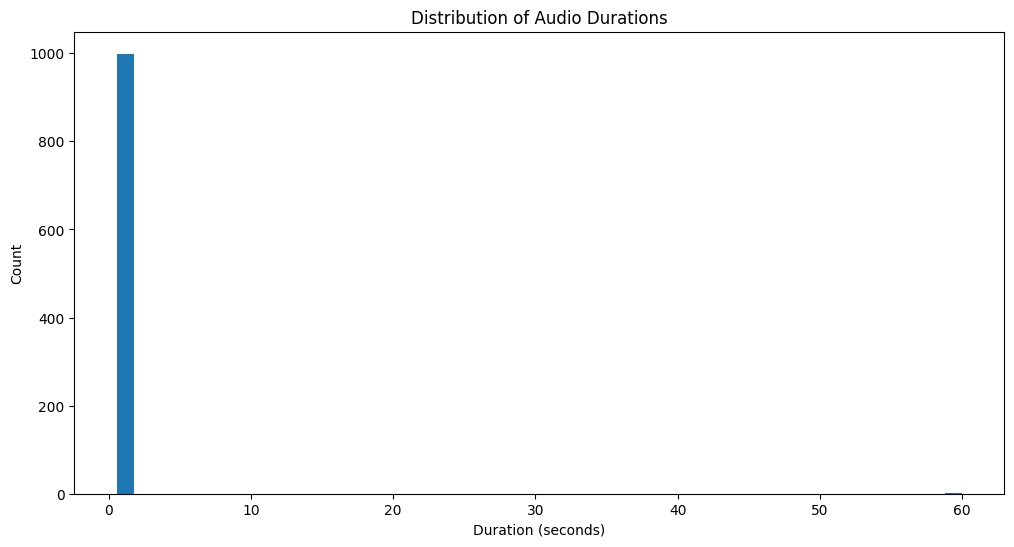


Min duration: 0.5547 seconds
Max duration: 60.0000 seconds
Mean duration: 1.0449 seconds
Duration std dev: 1.8661 seconds


In [5]:
# 3. Audio duration analysis
# Get all .wav files
wav_files = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith('.wav'):
            wav_files.append(os.path.join(root, file))

# Sample a subset for speed (adjust as needed)
sample_size = 1000
if len(wav_files) > sample_size:
    wav_files = np.random.choice(wav_files, sample_size, replace=False)

durations = []
for wav_file in tqdm(wav_files):
    # Load audio file
    audio, sr = librosa.load(wav_file, sr=None)
    duration = len(audio) / sr
    durations.append(duration)

plt.figure(figsize=(12, 6))
plt.hist(durations, bins=50)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

print(f"\nMin duration: {min(durations):.4f} seconds")
print(f"Max duration: {max(durations):.4f} seconds")
print(f"Mean duration: {np.mean(durations):.4f} seconds")
print(f"Duration std dev: {np.std(durations):.4f} seconds")


--- Analyzing command: 'yes' ---


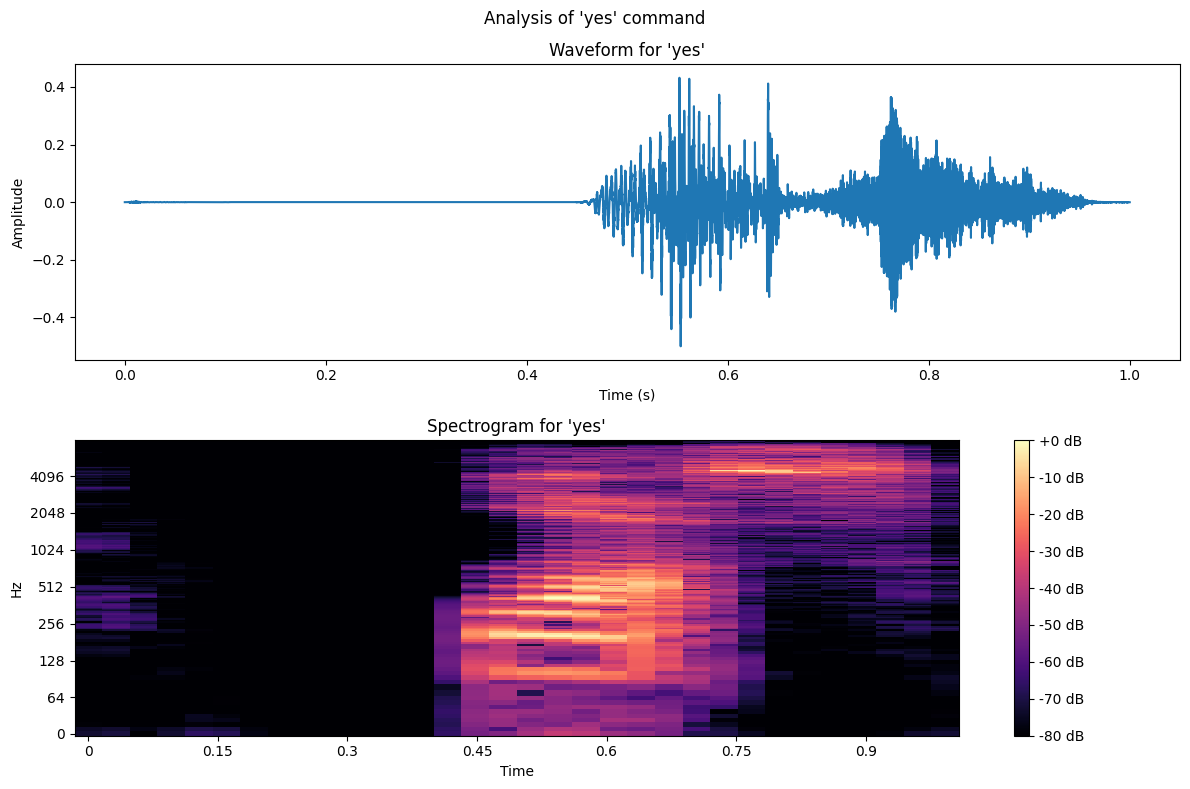


--- Analyzing command: 'no' ---


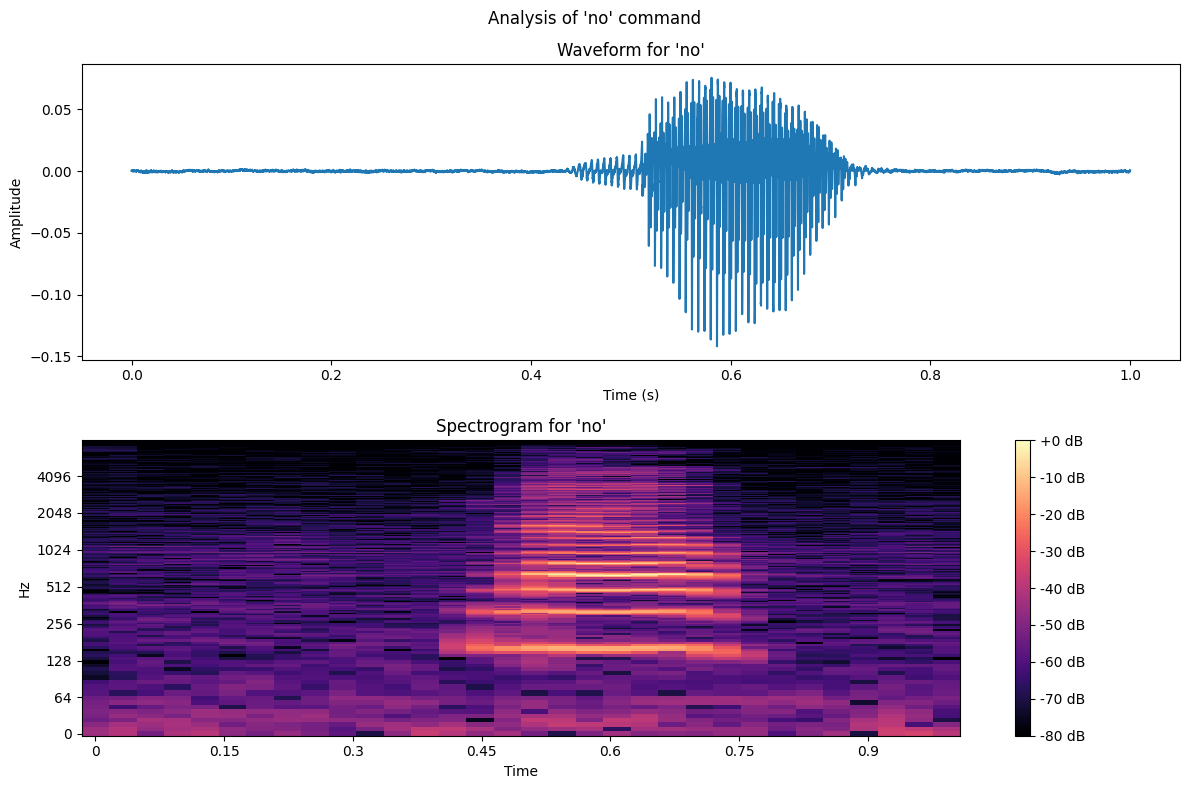


--- Analyzing command: 'up' ---


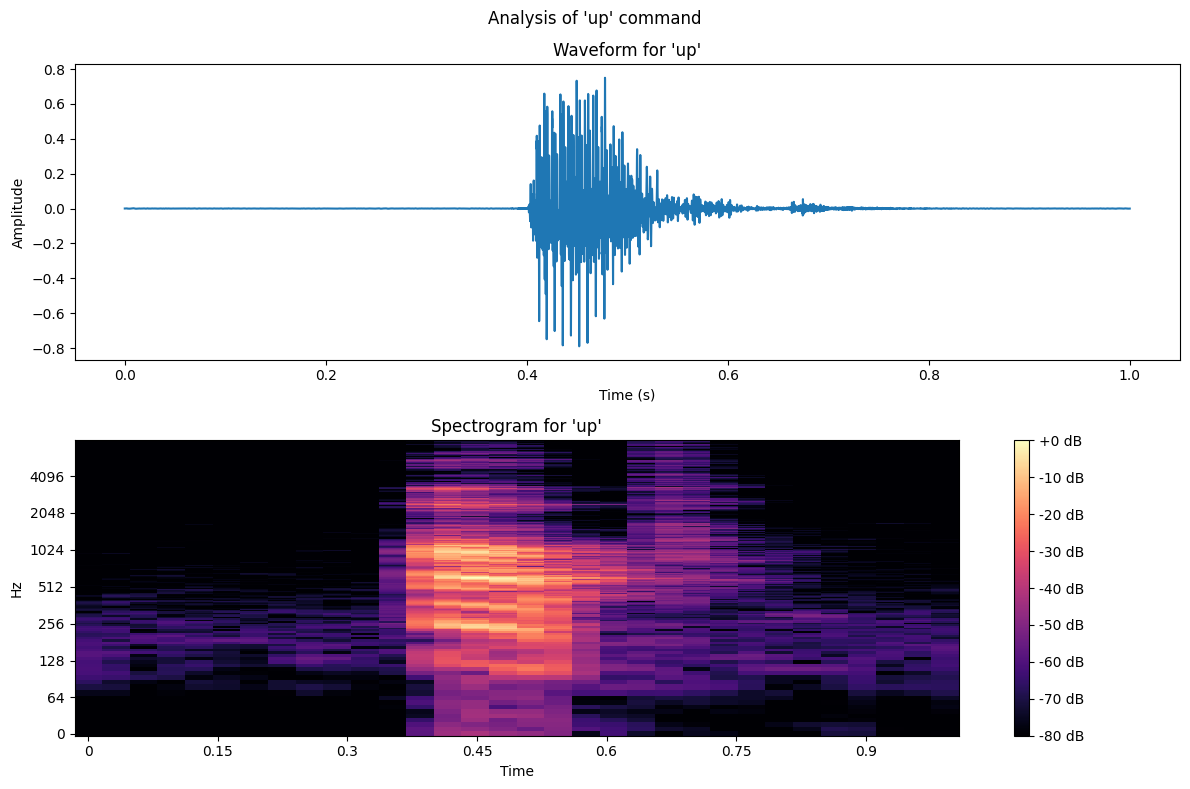


--- Analyzing command: 'down' ---


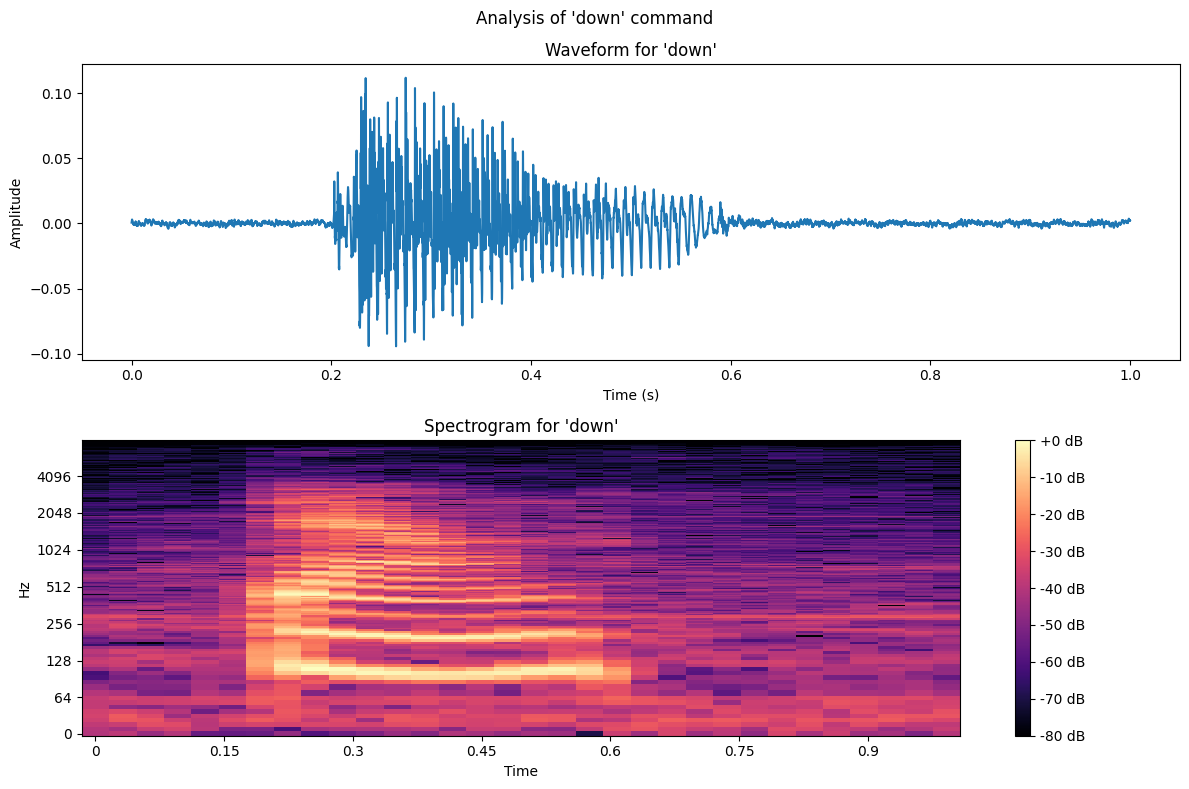

In [6]:
# 5. Compare spectrograms across different commands
import random
from IPython.display import Audio
# Commands to compare
commands_to_compare = ['yes', 'no', 'up', 'down']

def plot_spectrogram(audio_path, title=None):
    # Load audio
    audio, sr = librosa.load(audio_path, sr=None)
    label = os.path.basename(os.path.dirname(audio_path))

    plt.figure(figsize=(12, 8))

    # Plot waveform
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(audio))/sr, audio)
    plt.title(f"Waveform for '{label}'")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot spectrogram
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram for '{label}'")

    if title:
        plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    # Play the audio
    return Audio(audio, rate=sr)

# Find example files for each command
for cmd in commands_to_compare:
    cmd_dir = os.path.join(data_path, cmd)
    if os.path.exists(cmd_dir):
        # Get list of all wav files for this command
        cmd_files = [os.path.join(cmd_dir, f) for f in os.listdir(cmd_dir)
                    if f.endswith('.wav')]

        if cmd_files:
            # Choose a random example
            example_file = random.choice(cmd_files)
            print(f"\n--- Analyzing command: '{cmd}' ---")
            audio_player = plot_spectrogram(example_file, f"Analysis of '{cmd}' command")
            display(audio_player)

Available commands in the dataset: ['nine', 'up', 'eight', 'tree', 'sheila', 'six', 'seven', 'left', 'down', 'zero', 'marvin', 'on', 'five', 'one', 'bird', 'yes', 'happy', 'cat', 'wow', 'off', 'three', 'stop', 'no', 'right', 'four', 'go', 'dog', 'house', 'bed', 'two']

--- Analyzing command: 'off' ---


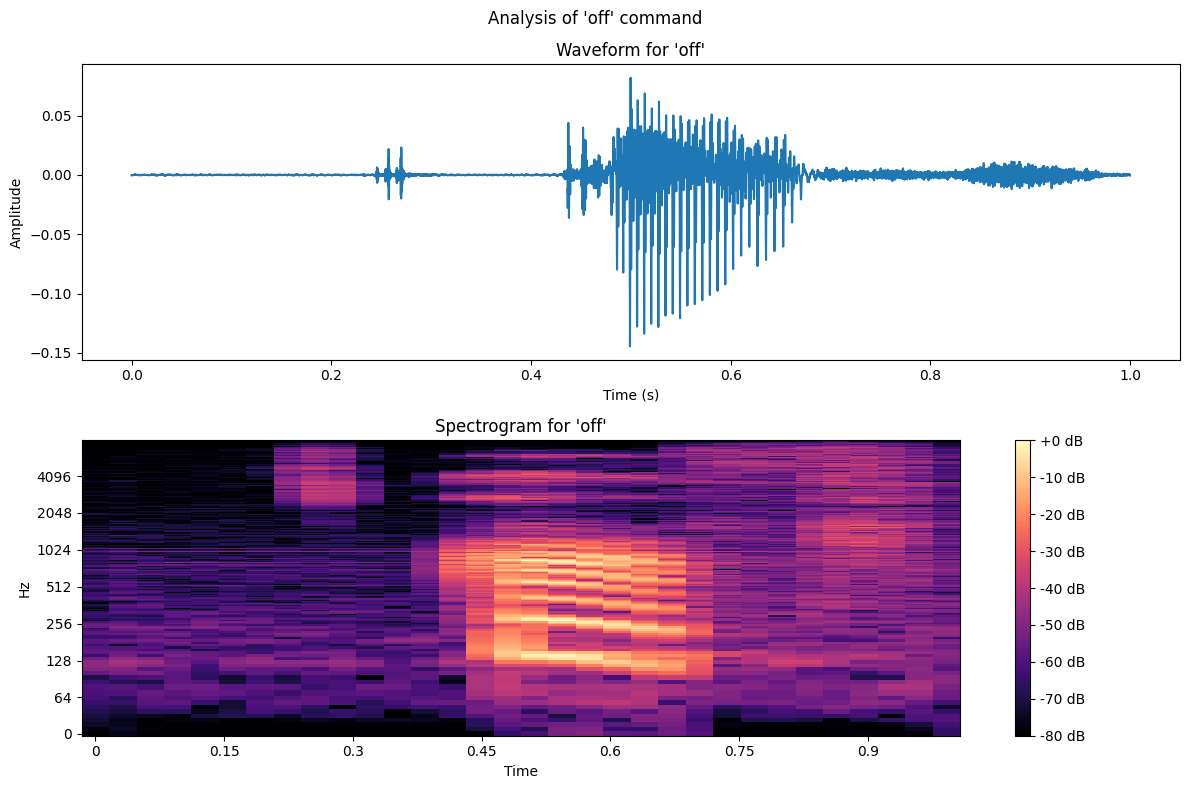


--- Analyzing command: 'go' ---


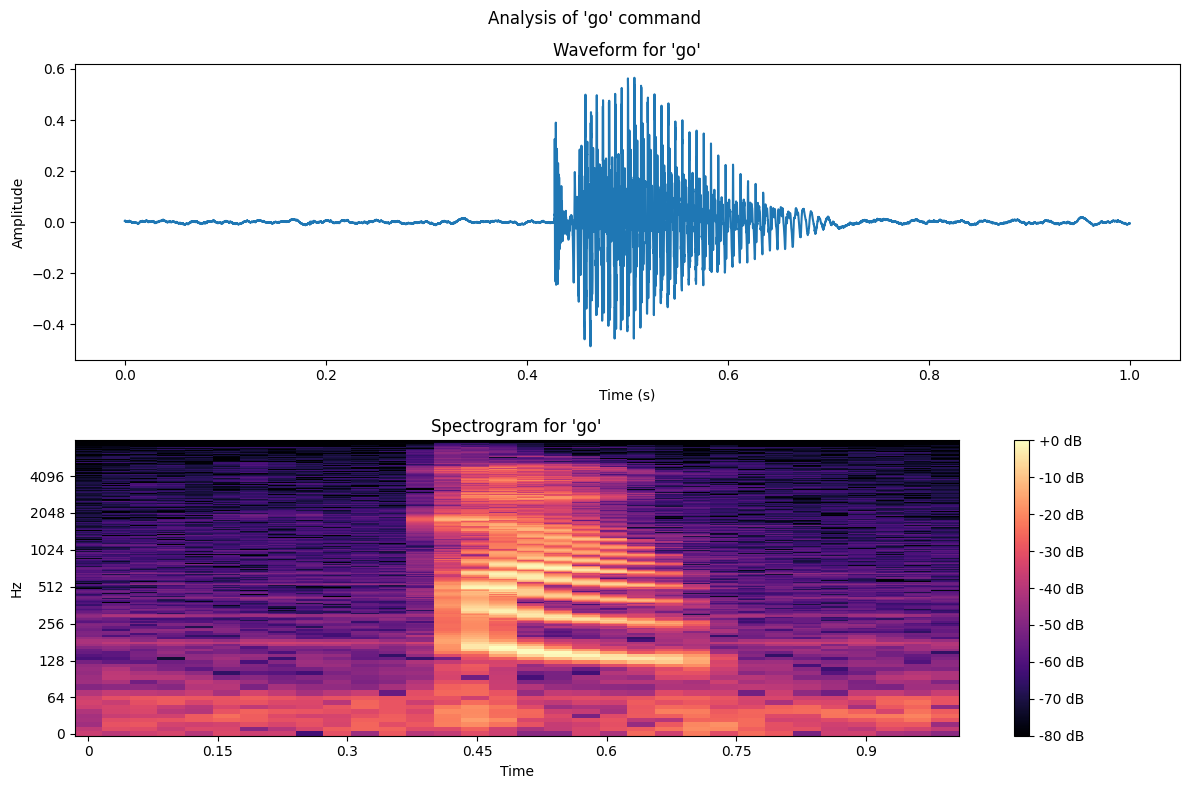


--- Analyzing command: 'on' ---


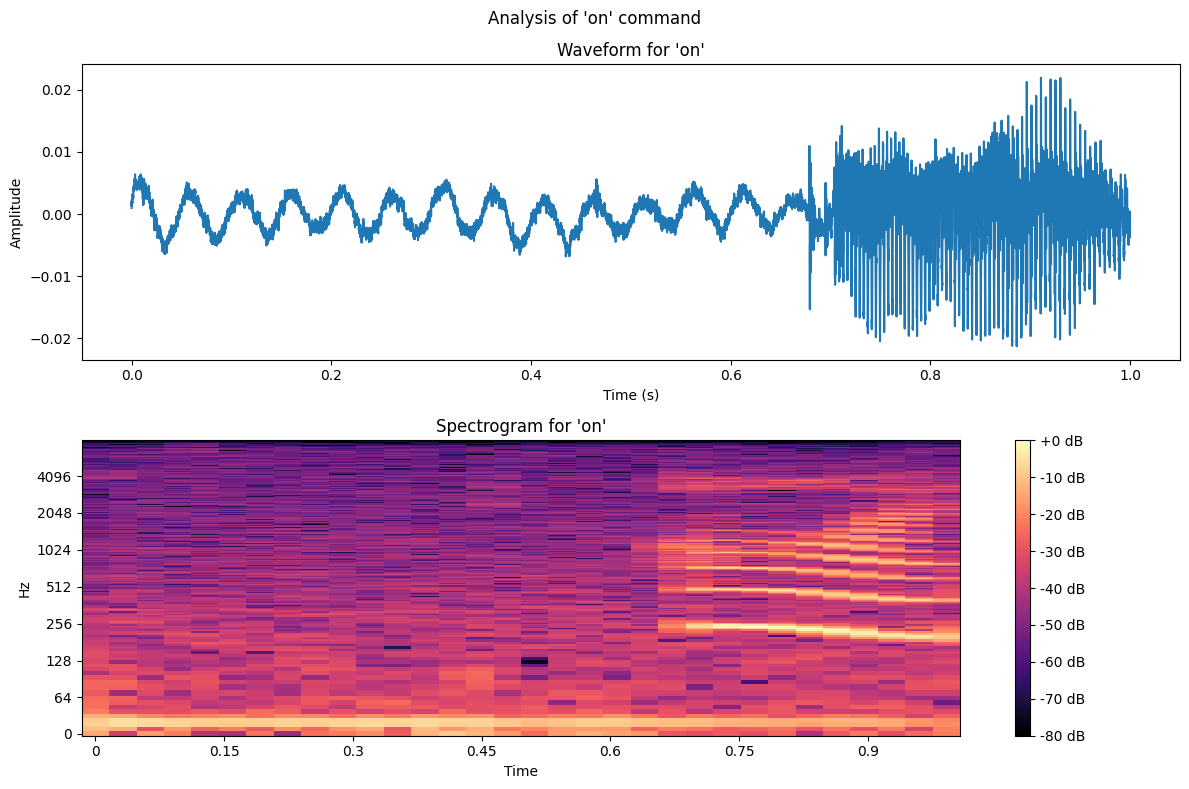


--- Analyzing command: 'four' ---


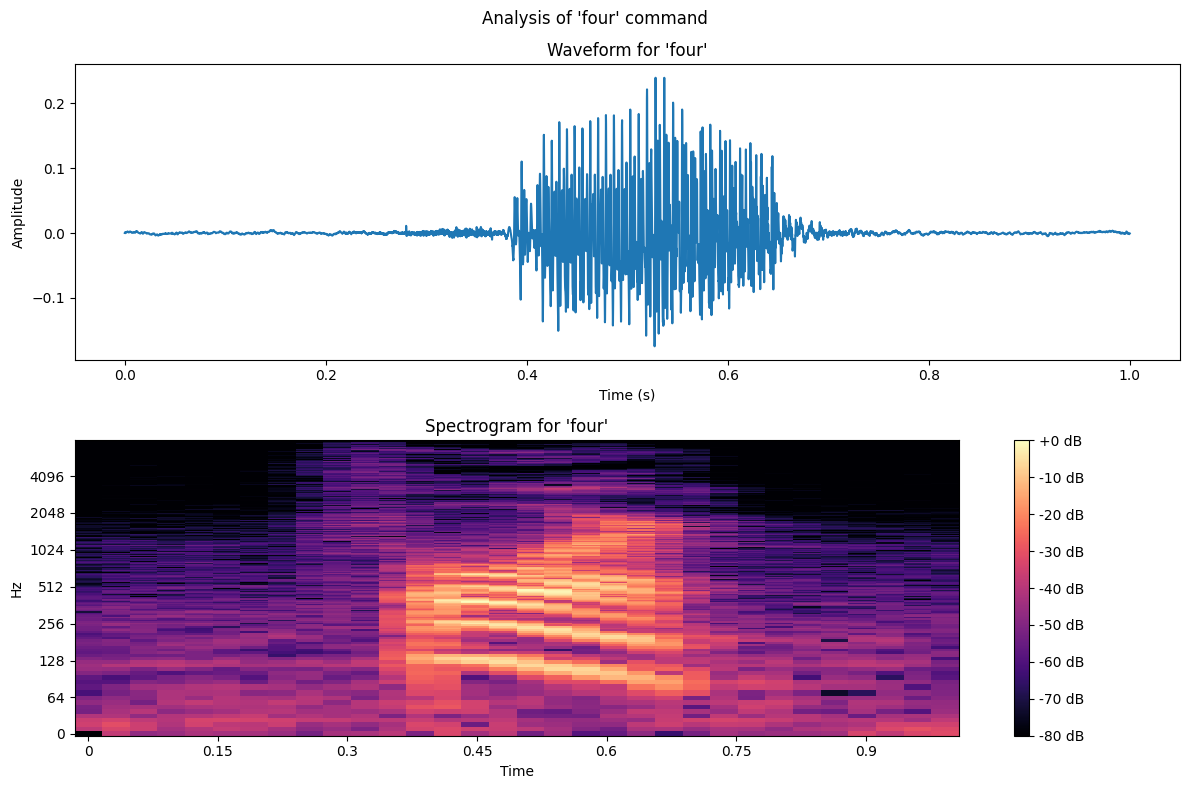


--- Analyzing command: 'eight' ---


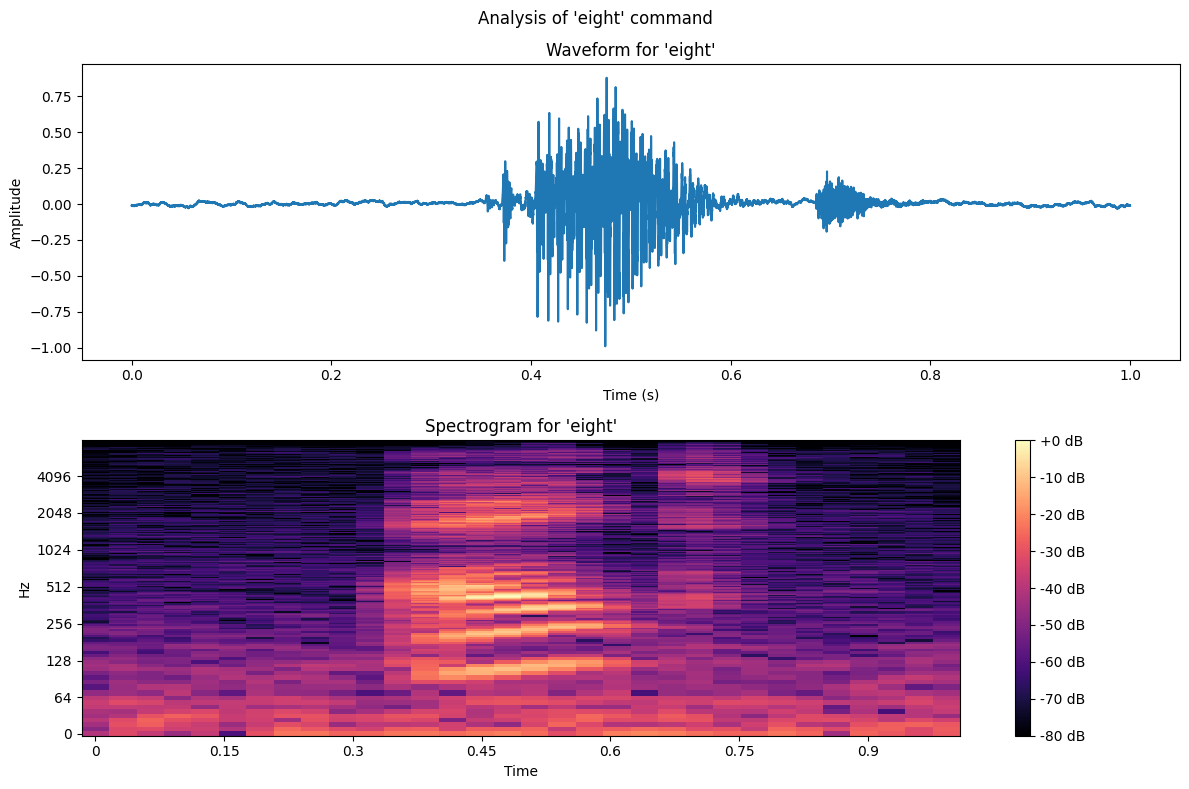


--- Analyzing command: 'five' ---


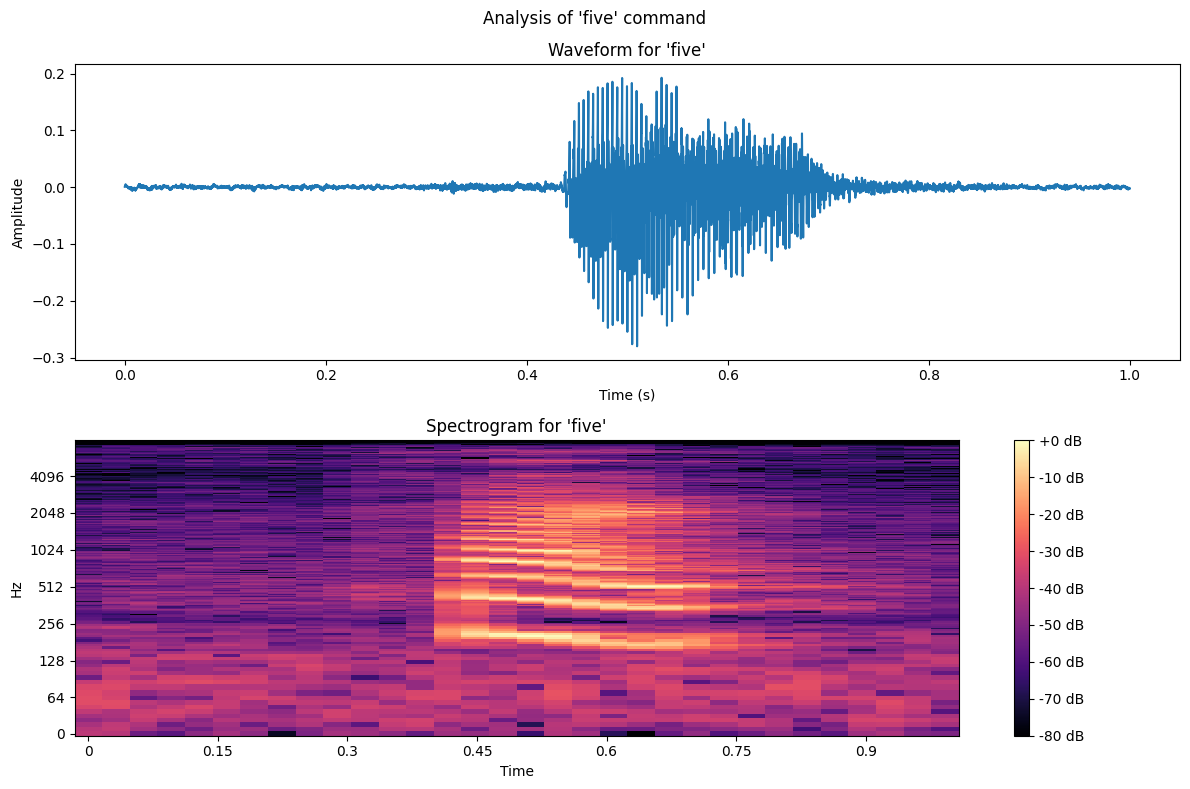


--- Analyzing command: 'bed' ---


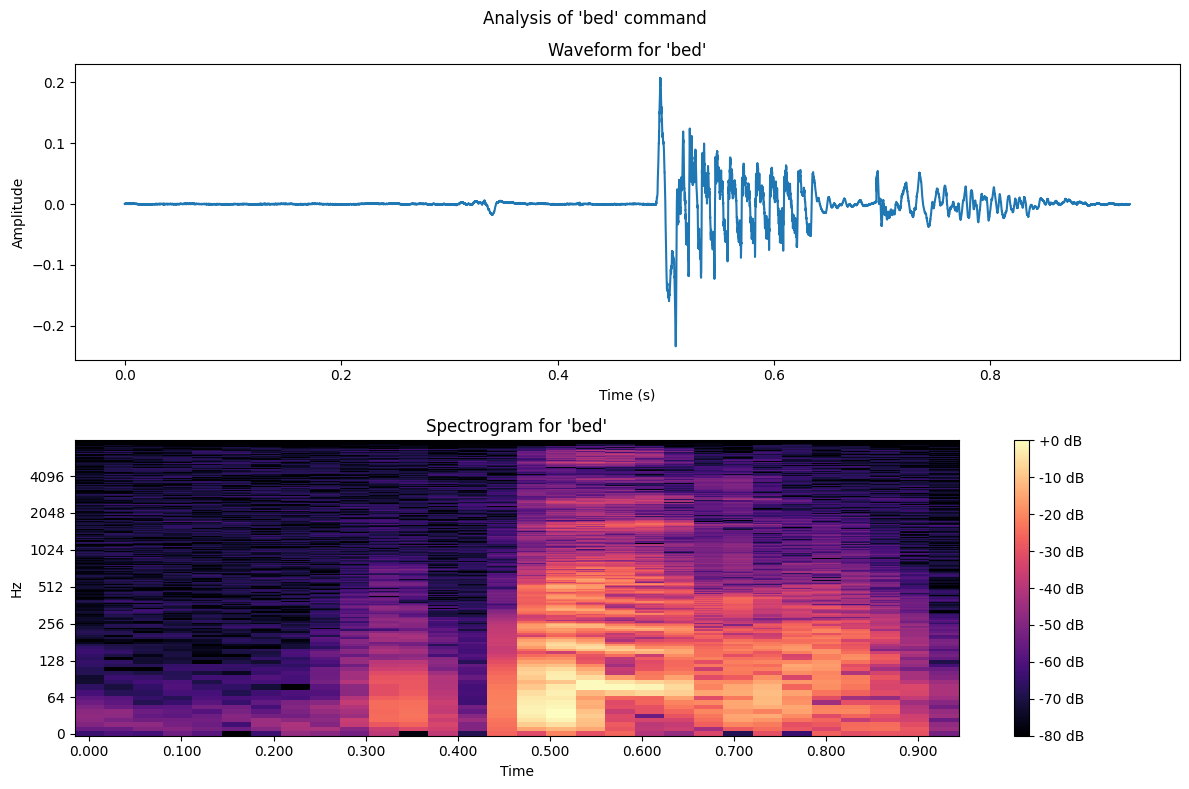


--- Analyzing command: 'sheila' ---


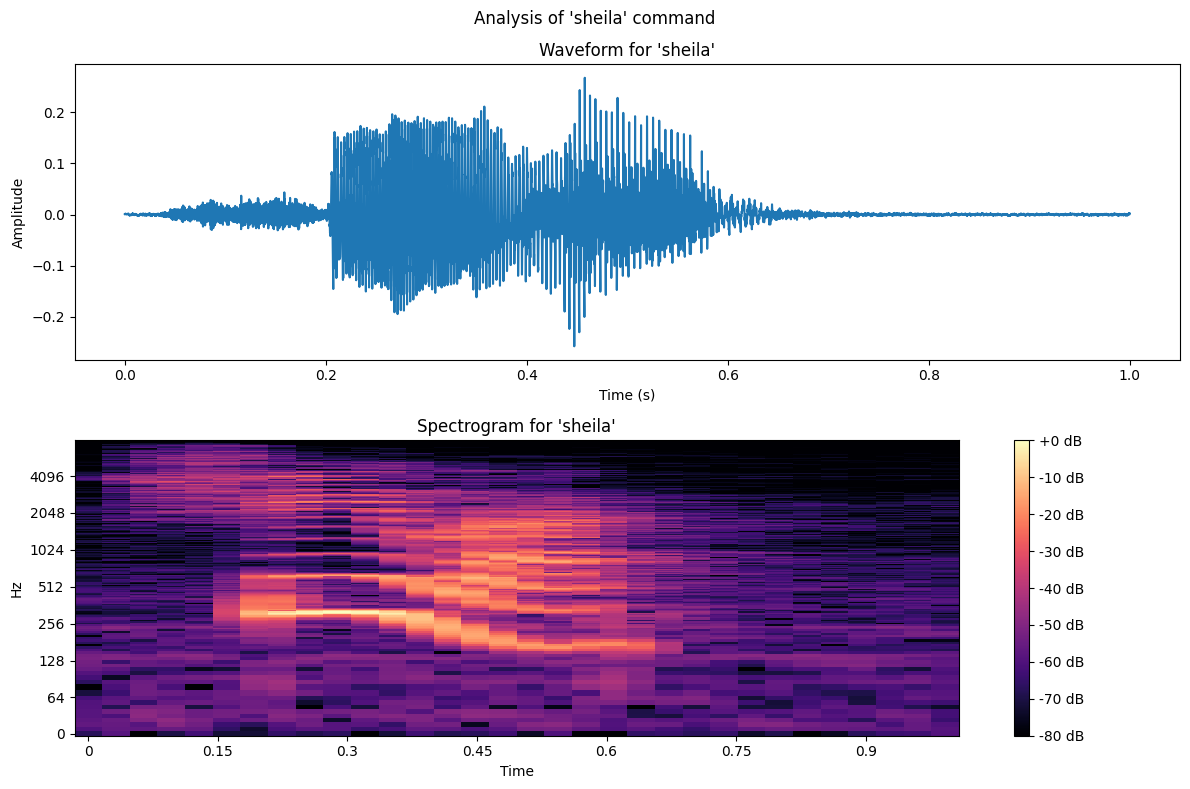


--- Analyzing command: 'wow' ---


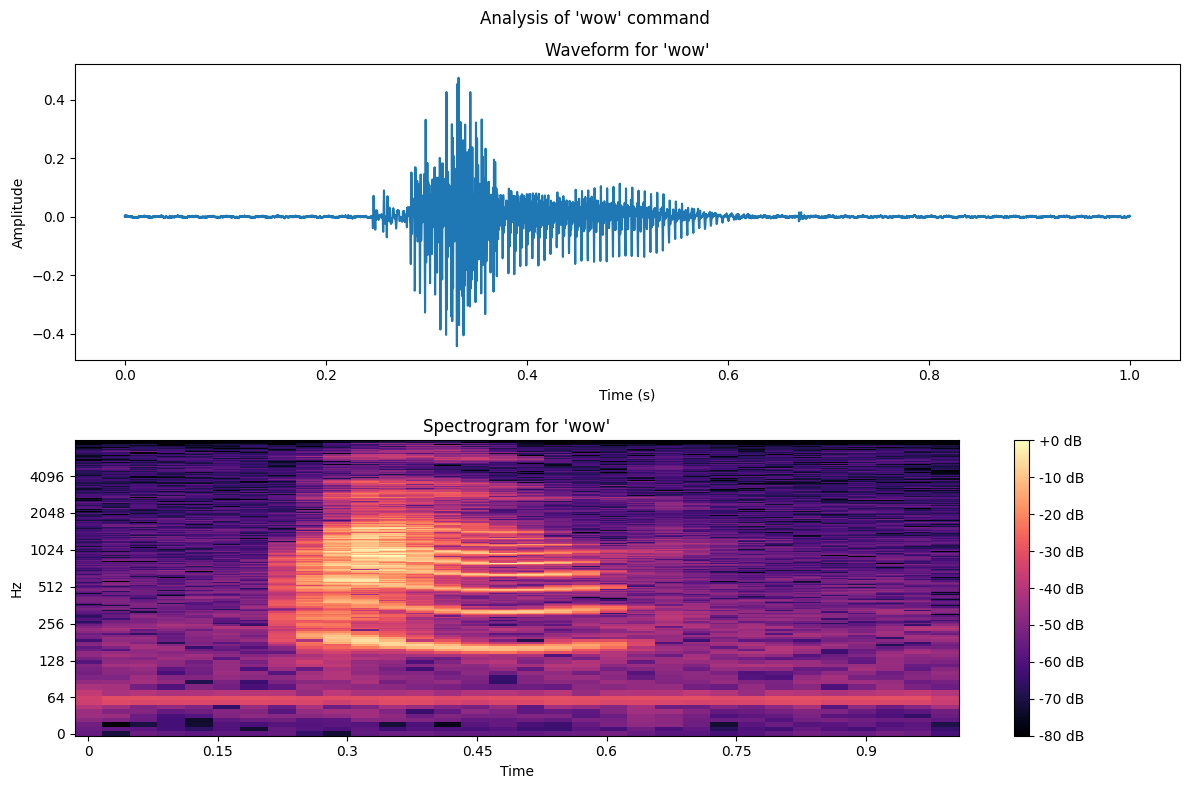

In [7]:
# 5. Spectrograms for diverse command samples
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import random

# Path to dataset
data_path = "speech_commands"

# Get all command categories (folders)
commands = [d for d in os.listdir(data_path)
            if os.path.isdir(os.path.join(data_path, d))
            and not d.startswith('_')]

print(f"Available commands in the dataset: {commands}")

# Select a diverse sample of commands (core commands and others)
core_commands = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
digit_commands = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
other_commands = [cmd for cmd in commands if cmd not in core_commands and cmd not in digit_commands]

# Create a diverse sample
sample_commands = []
sample_commands.extend(random.sample(core_commands, min(3, len(core_commands))))
sample_commands.extend(random.sample(digit_commands, min(3, len(digit_commands))))
sample_commands.extend(random.sample(other_commands, min(3, len(other_commands))))

def plot_spectrogram(audio_path, title=None):
    # Load audio
    audio, sr = librosa.load(audio_path, sr=None)
    label = os.path.basename(os.path.dirname(audio_path))

    plt.figure(figsize=(12, 8))

    # Plot waveform
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(audio))/sr, audio)
    plt.title(f"Waveform for '{label}'")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot spectrogram
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram for '{label}'")

    if title:
        plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    # Play the audio
    return Audio(audio, rate=sr)

# Find example files for each command in our sample
for cmd in sample_commands:
    cmd_dir = os.path.join(data_path, cmd)
    if os.path.exists(cmd_dir):
        # Get list of all wav files for this command
        cmd_files = [os.path.join(cmd_dir, f) for f in os.listdir(cmd_dir)
                    if f.endswith('.wav')]

        if cmd_files:
            # Choose a random example
            example_file = random.choice(cmd_files)
            print(f"\n--- Analyzing command: '{cmd}' ---")
            audio_player = plot_spectrogram(example_file, f"Analysis of '{cmd}' command")
            display(audio_player)

## CNN

In [4]:
import os
import numpy as np
import librosa
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import pickle

# Path to dataset
data_path = "speech_commands"

def extract_mfcc_features(file_path, n_mfcc=13, include_deltas=True):
    """Extract MFCC features from an audio file"""
    try:
        # Load audio with original sample rate
        audio, sr = librosa.load(file_path, sr=None)

        # Standardize length to 1 second (typical for this dataset)
        target_length = sr
        if len(audio) < target_length:
            # Pad shorter audio
            audio = np.pad(audio, (0, target_length - len(audio)), 'constant')
        elif len(audio) > target_length:
            # Truncate longer audio
            audio = audio[:target_length]

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

        if include_deltas:
            # Add delta and delta-delta features
            delta_mfccs = librosa.feature.delta(mfccs)
            delta2_mfccs = librosa.feature.delta(mfccs, order=2)
            # Combine features
            features = np.concatenate([mfccs, delta_mfccs, delta2_mfccs])
        else:
            features = mfccs

        # Transpose to [time, features] format
        features = features.T

        return features

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Collect all WAV files and their labels
files = []
labels = []

# Walk through directories
for root, dirs, filenames in os.walk(data_path):
    for filename in filenames:
        if filename.endswith('.wav'):
            # Get the label from the directory name
            label = os.path.basename(root)
            # Skip background noise
            if label != '_background_noise_':
                file_path = os.path.join(root, filename)
                files.append(file_path)
                labels.append(label)

print(f"Found {len(files)} audio files with {len(set(labels))} unique labels")

# Create label mapping
unique_labels = sorted(list(set(labels)))
label_to_index = {label: i for i, label in enumerate(unique_labels)}
index_to_label = {i: label for i, label in enumerate(unique_labels)}

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(files, labels,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                               test_size=0.5,
                                               random_state=42,
                                               stratify=y_temp)

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

# Process features in batches to avoid memory issues
def process_features_batch(file_list, label_list, batch_size=1000):
    features = []
    processed_labels = []

    for i in tqdm(range(0, len(file_list), batch_size)):
        batch_files = file_list[i:i+batch_size]
        batch_labels = label_list[i:i+batch_size]

        for file_path, label in zip(batch_files, batch_labels):
            mfcc = extract_mfcc_features(file_path)
            if mfcc is not None:
                features.append(mfcc)
                processed_labels.append(label_to_index[label])

    # Convert to numpy arrays
    features = np.array(features)
    processed_labels = np.array(processed_labels)

    return features, processed_labels

# Process the data
print("Extracting features for training set...")
X_train_features, y_train_indices = process_features_batch(X_train, y_train)

print("Extracting features for validation set...")
X_val_features, y_val_indices = process_features_batch(X_val, y_val)

print("Extracting features for test set...")
X_test_features, y_test_indices = process_features_batch(X_test, y_test)

# Save processed features to avoid recomputation
os.makedirs('processed_features', exist_ok=True)
with open('processed_features/mfcc_features.pkl', 'wb') as f:
    pickle.dump({
        'X_train': X_train_features,
        'y_train': y_train_indices,
        'X_val': X_val_features,
        'y_val': y_val_indices,
        'X_test': X_test_features,
        'y_test': y_test_indices,
        'label_to_index': label_to_index,
        'index_to_label': index_to_label
    }, f)

print("Features extracted and saved successfully!")

Found 64721 audio files with 30 unique labels
Training set: 45304 samples
Validation set: 9708 samples
Test set: 9709 samples
Extracting features for training set...


  0%|          | 0/46 [00:00<?, ?it/s]

Extracting features for validation set...


  0%|          | 0/10 [00:00<?, ?it/s]

Extracting features for test set...


  0%|          | 0/10 [00:00<?, ?it/s]

Features extracted and saved successfully!


In [10]:
import os
import numpy as np
import librosa
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import pickle
import random

# Path to dataset
data_path = "speech_commands"

def extract_mfcc_features(file_path, n_mfcc=13, include_deltas=True):
    """Extract MFCC features from an audio file"""
    try:
        # Load audio with original sample rate
        audio, sr = librosa.load(file_path, sr=None)

        # Standardize length to 1 second (typical for this dataset)
        target_length = sr
        if len(audio) < target_length:
            # Pad shorter audio
            audio = np.pad(audio, (0, target_length - len(audio)), 'constant')
        elif len(audio) > target_length:
            # Truncate longer audio
            audio = audio[:target_length]

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

        if include_deltas:
            # Add delta and delta-delta features
            delta_mfccs = librosa.feature.delta(mfccs)
            delta2_mfccs = librosa.feature.delta(mfccs, order=2)
            # Combine features
            features = np.concatenate([mfccs, delta_mfccs, delta2_mfccs])
        else:
            features = mfccs

        # Transpose to [time, features] format
        features = features.T

        return features

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Collect all WAV files and their labels
files = []
labels = []

# Walk through directories
for root, dirs, filenames in os.walk(data_path):
    for filename in filenames:
        if filename.endswith('.wav'):
            # Get the label from the directory name
            label = os.path.basename(root)
            # Skip background noise
            if label != '_background_noise_':
                file_path = os.path.join(root, filename)
                files.append(file_path)
                labels.append(label)

print(f"Found {len(files)} total audio files with {len(set(labels))} unique labels")

# Get a stratified sample of 1000 files
unique_labels = sorted(list(set(labels)))
sampled_files = []
sampled_labels = []

# Calculate how many samples per class (with a minimum of 1)
samples_per_class = max(1, 1000 // len(unique_labels))

for label in unique_labels:
    # Get all files for this label
    label_files = [f for f, l in zip(files, labels) if l == label]
    # Take a sample (or all if there are fewer than samples_per_class)
    sample_size = min(len(label_files), samples_per_class)
    class_sample = random.sample(label_files, sample_size)

    sampled_files.extend(class_sample)
    sampled_labels.extend([label] * len(class_sample))

# If we haven't reached 1000 samples, add more from classes with more samples
if len(sampled_files) < 1000:
    remaining = 1000 - len(sampled_files)
    # Identify classes with extra samples available
    extra_samples = []
    for label in unique_labels:
        label_files = [f for f, l in zip(files, labels) if l == label]
        already_sampled = [f for f in sampled_files if os.path.basename(os.path.dirname(f)) == label]
        remaining_files = [f for f in label_files if f not in already_sampled]
        extra_samples.extend([(f, label) for f in remaining_files])

    # Take random samples from the extra pool
    if extra_samples and remaining > 0:
        extra_count = min(remaining, len(extra_samples))
        additional_samples = random.sample(extra_samples, extra_count)

        for file_path, label in additional_samples:
            sampled_files.append(file_path)
            sampled_labels.append(label)

# Use the sampled files instead of all files
files = sampled_files[:1000]
labels = sampled_labels[:1000]

print(f"Using a stratified sample of {len(files)} audio files")

# Create label mapping
unique_labels = sorted(list(set(labels)))
label_to_index = {label: i for i, label in enumerate(unique_labels)}
index_to_label = {i: label for i, label in enumerate(unique_labels)}

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(files, labels,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                               test_size=0.5,
                                               random_state=42,
                                               stratify=y_temp)

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

# Extract features for all files at once (since we're only using 1000 samples)
print("Extracting features...")
X_train_features = []
y_train_indices = []
for file_path, label in tqdm(zip(X_train, y_train), total=len(X_train)):
    mfcc = extract_mfcc_features(file_path)
    if mfcc is not None:
        X_train_features.append(mfcc)
        y_train_indices.append(label_to_index[label])

X_val_features = []
y_val_indices = []
for file_path, label in tqdm(zip(X_val, y_val), total=len(X_val)):
    mfcc = extract_mfcc_features(file_path)
    if mfcc is not None:
        X_val_features.append(mfcc)
        y_val_indices.append(label_to_index[label])

X_test_features = []
y_test_indices = []
for file_path, label in tqdm(zip(X_test, y_test), total=len(X_test)):
    mfcc = extract_mfcc_features(file_path)
    if mfcc is not None:
        X_test_features.append(mfcc)
        y_test_indices.append(label_to_index[label])

# Convert to numpy arrays
X_train_features = np.array(X_train_features)
y_train_indices = np.array(y_train_indices)
X_val_features = np.array(X_val_features)
y_val_indices = np.array(y_val_indices)
X_test_features = np.array(X_test_features)
y_test_indices = np.array(y_test_indices)

# Save processed features
os.makedirs('processed_features', exist_ok=True)
with open('processed_features/mfcc_features_1k_sample.pkl', 'wb') as f:
    pickle.dump({
        'X_train': X_train_features,
        'y_train': y_train_indices,
        'X_val': X_val_features,
        'y_val': y_val_indices,
        'X_test': X_test_features,
        'y_test': y_test_indices,
        'label_to_index': label_to_index,
        'index_to_label': index_to_label
    }, f)

print("Features extracted and saved successfully!")

Found 64721 total audio files with 30 unique labels
Using a stratified sample of 1000 audio files
Training set: 700 samples
Validation set: 150 samples
Test set: 150 samples
Extracting features...


  0%|          | 0/700 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

Features extracted and saved successfully!


Training data shape: (700, 32, 39, 1)
Number of classes: 30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 39, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 19, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 19, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 19, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           7,710 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 624,926 (2.38 MB)

 Trainable params: 624,926 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.0340 - loss: 27.4738 - val_accuracy: 0.0333 - val_loss: 3.3964
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.0638 - loss: 3.4321 - val_accuracy: 0.0333 - val_loss: 3.4006
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.0371 - loss: 3.4050 - val_accuracy: 0.0333 - val_loss: 3.4003
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - accuracy: 0.0426 - loss: 3.4065 - val_accuracy: 0.0267 - val_loss: 3.3970
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.0495 - loss: 3.4090 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.0405 - loss: 3.4086 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.0470 - loss: 3.3956 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.0412 - loss: 3.4018 - val_accuracy: 0.03

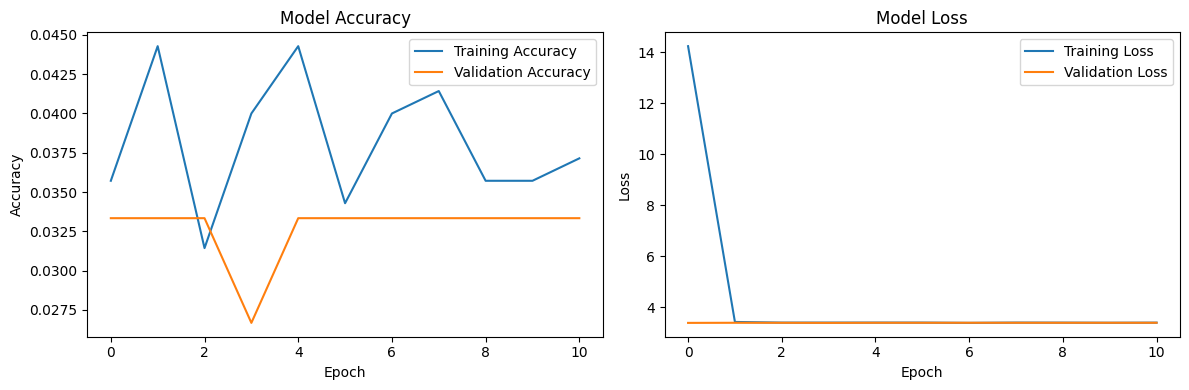

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


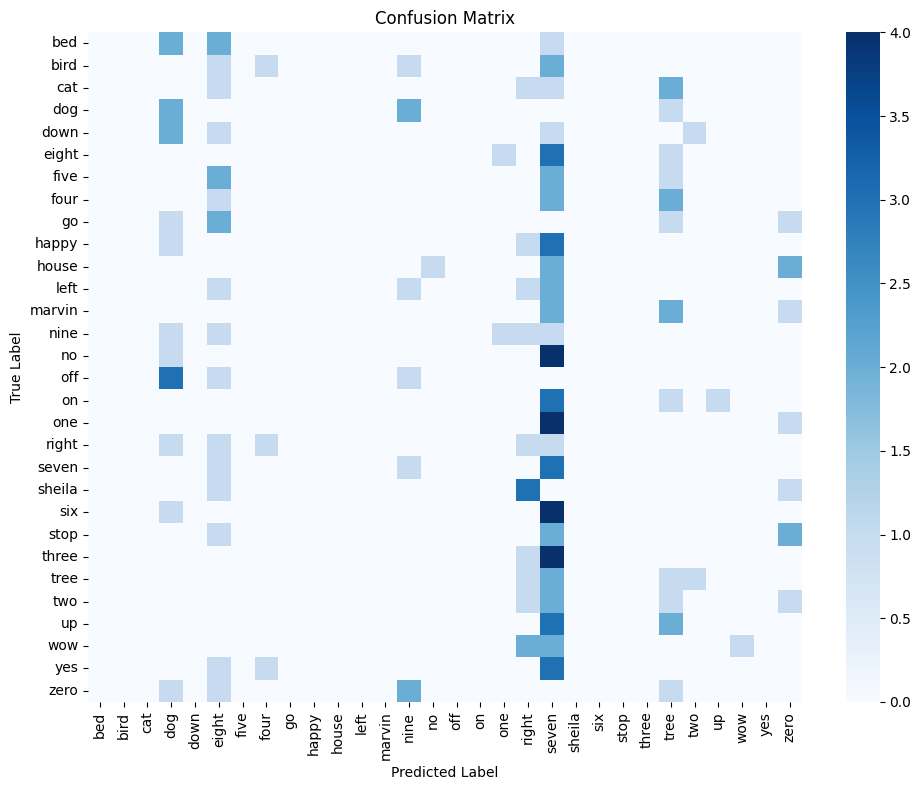

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
              precision    recall  f1-score   support

         bed       0.00      0.00      0.00         5
        bird       0.00      0.00      0.00         5
         cat       0.00      0.00      0.00         5
         dog       0.12      0.40      0.19         5
        down       0.00      0.00      0.00         5
       eight       0.00      0.00      0.00         5
        five       0.00      0.00      0.00         5
        four       0.00      0.00      0.00         5
          go       0.00      0.00      0.00         5
       happy       0.00      0.00      0.00         5
       house       0.00      0.00      0.00         5
        left       0.00      0.00      0.00         5
      marvin       0.00      0.00      0.00         5
        nine       0.00      0.00      0.00         5
          no       0.00      0.00      0.00         5
         off       0.00      0.00      0.00         5
          on       0.00      0.00      0.00         5
   

In [11]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed features
with open('processed_features/mfcc_features_1k_sample.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']
label_to_index = data['label_to_index']
index_to_label = data['index_to_label']

num_classes = len(label_to_index)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

# Reshape features for CNN: (batch, time_steps, features, channels)
# Assuming X_train shape is (n_samples, time_steps, n_features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print("Training data shape:", X_train_reshaped.shape)
print("Number of classes:", num_classes)

# Build the CNN model
def build_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third convolutional block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten and dense layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Build and compile the model
model = build_cnn_model(X_train_reshaped.shape[1:], num_classes)
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_reshaped,
    y_train_onehot,
    batch_size=32,
    epochs=50,
    validation_data=(X_val_reshaped, y_val_onehot),
    callbacks=[early_stopping]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_onehot)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=[index_to_label[i] for i in range(num_classes)],
            yticklabels=[index_to_label[i] for i in range(num_classes)])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print classification report
class_names = [index_to_label[i] for i in range(num_classes)]
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Save the model
model.save('speech_commands_cnn_model.h5')
print("Model saved successfully!")

## Audio Transformer

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def scaled_dot_product_attention(queries, keys, values, mask=None):
    # Calculate the attention weights
    matmul_qk = tf.matmul(queries, keys, transpose_b=True)

    # Scale matmul_qk
    depth = tf.cast(tf.shape(keys)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # Add the mask to the scaled tensor (if provided)
    if mask is not None:
        logits += (mask * -1e9)

    # Softmax is normalized on the last axis (seq_len_k)
    attention_weights = tf.nn.softmax(logits, axis=-1)

    output = tf.matmul(attention_weights, values)

    return output, attention_weights

class MultiHeadAttentionLayer(layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttentionLayer, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = layers.Dense(d_model)
        self.wk = layers.Dense(d_model)
        self.wv = layers.Dense(d_model)

        self.dense = layers.Dense(d_model)

    def call(self, inputs):
        # inputs will be a list [v, k, q]
        v, k, q = inputs

        batch_size = tf.shape(q)[0]

        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)

        # Reshape to (batch_size, num_heads, seq_len, depth)
        q = tf.reshape(q, (batch_size, -1, self.num_heads, self.depth))
        q = tf.transpose(q, perm=[0, 2, 1, 3])

        k = tf.reshape(k, (batch_size, -1, self.num_heads, self.depth))
        k = tf.transpose(k, perm=[0, 2, 1, 3])

        v = tf.reshape(v, (batch_size, -1, self.num_heads, self.depth))
        v = tf.transpose(v, perm=[0, 2, 1, 3])

        # Scaled dot-product attention
        matmul_qk = tf.matmul(q, k, transpose_b=True)

        # Scale matmul_qk
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

        # Softmax is normalized on the last axis (seq_len_k)
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

        output = tf.matmul(attention_weights, v)  # (batch_size, num_heads, seq_len_q, depth)
        output = tf.transpose(output, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

        # Concatenate heads
        concat_attention = tf.reshape(output, (batch_size, -1, self.d_model))

        # Final linear layer
        output = self.dense(concat_attention)

        return output

class PositionalEncoding(layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def positional_encoding(self, position, d_model):
        # Precompute positional encoding at initialization
        positions = tf.range(position, dtype=tf.float32)[:, tf.newaxis]
        div_term = tf.exp(tf.range(0, d_model, 2, dtype=tf.float32) * -(tf.math.log(10000.0) / d_model))

        pos_encoding = tf.zeros((position, d_model))

        # Calculate sin terms
        sin_indices = tf.range(0, d_model, 2, dtype=tf.int32)
        sin_values = tf.sin(positions * div_term)
        sin_indices_expanded = tf.expand_dims(sin_indices, 0)
        sin_values_expanded = tf.expand_dims(sin_values, 1)

        # Use tensor_scatter_nd_update for sin values
        pos_encoding = tf.tensor_scatter_nd_update(
            pos_encoding,
            tf.stack([
                tf.repeat(tf.range(position), tf.shape(sin_indices)[0]),
                tf.tile(sin_indices, [position])
            ], axis=1),
            tf.reshape(sin_values, [-1])
        )

        # Calculate cos terms
        cos_indices = tf.range(1, d_model, 2, dtype=tf.int32)
        cos_values = tf.cos(positions * div_term)
        cos_indices_expanded = tf.expand_dims(cos_indices, 0)
        cos_values_expanded = tf.expand_dims(cos_values, 1)

        # Use tensor_scatter_nd_update for cos values
        pos_encoding = tf.tensor_scatter_nd_update(
            pos_encoding,
            tf.stack([
                tf.repeat(tf.range(position), tf.shape(cos_indices)[0]),
                tf.tile(cos_indices, [position])
            ], axis=1),
            tf.reshape(cos_values, [-1])
        )

        return pos_encoding[tf.newaxis, ...]

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

class TransformerBlock(layers.Layer):
    def __init__(self, d_model, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()

        self.attention = MultiHeadAttentionLayer(d_model, num_heads)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(d_model)
        ])

        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=True):
        # Self-attention with same inputs for Q, K, V
        attn_output = self.attention([inputs, inputs, inputs])
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [6]:
def build_audio_transformer(input_shape, num_classes, d_model=128, num_heads=4, ff_dim=256,
                           num_transformer_blocks=4, mlp_units=[128], dropout=0.1):

    inputs = layers.Input(shape=input_shape)

    # Reshape input for the transformer
    # From [batch, time_steps, features, channels] to [batch, time_steps, features*channels]
    # Assuming input is [batch, time_steps, features, 1]
    x = layers.Reshape((input_shape[0], input_shape[1] * input_shape[2]))(inputs)

    # Project to d_model dimensions
    x = layers.Dense(d_model)(x)

    # Add positional encoding - using a simpler approach
    position_embedding = layers.Embedding(
        input_dim=input_shape[0],
        output_dim=d_model
    )
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    positions = position_embedding(positions)
    x = x + positions

    # Add transformer blocks
    for _ in range(num_transformer_blocks):
        x = TransformerBlock(d_model, num_heads, ff_dim, dropout)(x)

    # Global pooling
    x = layers.GlobalAveragePooling1D()(x)

    # MLP head
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return models.Model(inputs, outputs)

In [7]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed features
with open('processed_features/mfcc_features.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']
label_to_index = data['label_to_index']
index_to_label = data['index_to_label']

num_classes = len(label_to_index)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

# Reshape features for transformer if needed
# Assuming MFCCs are in shape (n_samples, time_steps, n_features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print("Training data shape:", X_train_reshaped.shape)
print("Number of classes:", num_classes)

# Build the transformer model
model = build_audio_transformer(
    input_shape=X_train_reshaped.shape[1:],
    num_classes=num_classes,
    d_model=128,
    num_heads=8,
    ff_dim=256,
    num_transformer_blocks=4,
    mlp_units=[128],
    dropout=0.1
)

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model with early stopping and learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001
)

# You might want to add TensorBoard callback for visualization
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir="./logs/transformer_model",
    histogram_freq=1
)

history = model.fit(
    X_train_reshaped,
    y_train_onehot,
    batch_size=32,
    epochs=100,
    validation_data=(X_val_reshaped, y_val_onehot),
    callbacks=[early_stopping, reduce_lr, tensorboard_callback]
)

Training data shape: (45304, 32, 39, 1)
Number of classes: 30


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 39, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 32, 39)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32, 128)             │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ add (Add)                            │ (None, 32, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block (TransformerBlock) │ (None, 32, 128)             │         132,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_1                  │ (None, 32, 128)             │         132,480 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_2                  │ (None, 32, 128)             │         132,480 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_3                  │ (None, 32, 128)             │         132,480 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 555,422 (2.12 MB)

 Trainable params: 555,422 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 51s 20ms/step - accuracy: 0.3473 - loss: 2.2692 - val_accuracy: 0.7767 - val_loss: 0.7606 - learning_rate: 1.0000e-04
Epoch 2/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7796 - loss: 0.7592 - val_accuracy: 0.8389 - val_loss: 0.5439 - learning_rate: 1.0000e-04
Epoch 3/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8299 - loss: 0.5728 - val_accuracy: 0.8351 - val_loss: 0.5369 - learning_rate: 1.0000e-04
Epoch 4/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8578 - loss: 0.4775 - val_accuracy: 0.8701 - val_loss: 0.4342 - learning_rate: 1.0000e-04
Epoch 5/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8766 - loss: 0.4145 - val_accuracy: 0.8820 - val_loss: 0.3991 - learning_rate: 1.0000e-04
Epoch 6/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8852 - loss: 0.3820 - val_accuracy: 0.8882 - val_loss: 0.3805 - learning_rate: 1.0000e-04
Epoch 7/100
1416/1416 ━━━━━━━━━━━━━━

304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9410 - loss: 0.2499
Test accuracy: 0.9403


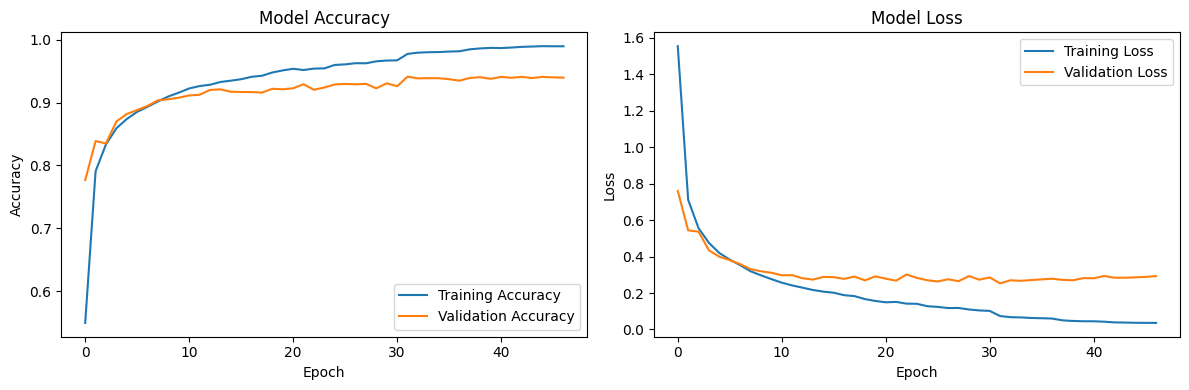

304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


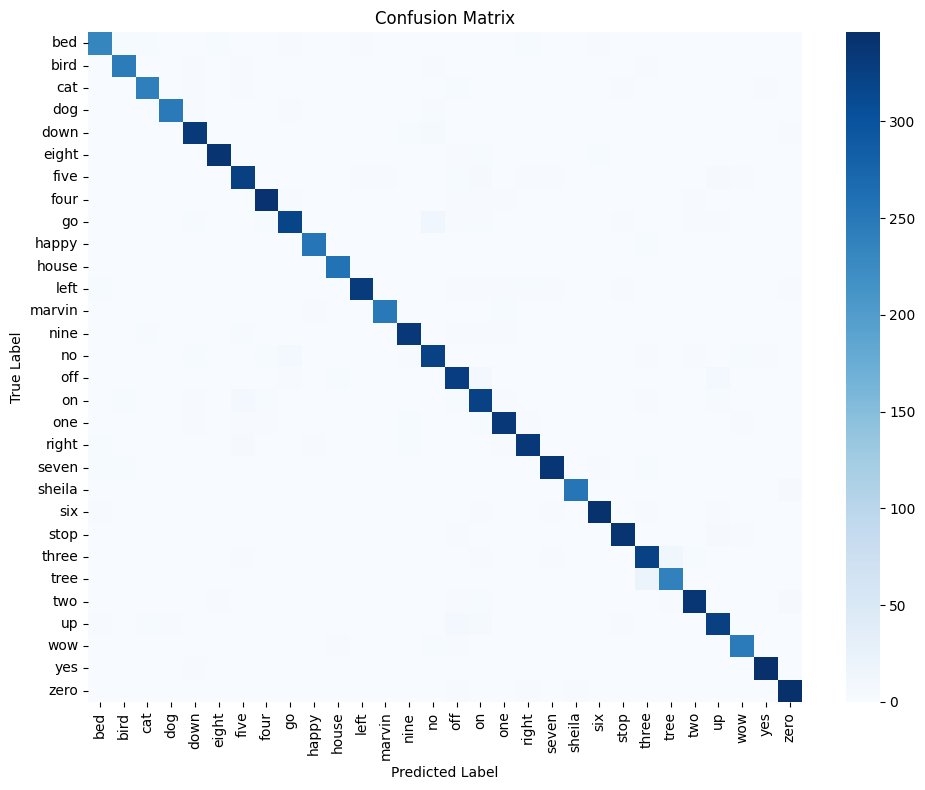


Classification Report:
              precision    recall  f1-score   support

         bed       0.92      0.91      0.92       257
        bird       0.94      0.95      0.94       259
         cat       0.93      0.93      0.93       260
         dog       0.96      0.95      0.95       262
        down       0.93      0.94      0.93       354
       eight       0.97      0.96      0.96       353
        five       0.91      0.92      0.92       353
        four       0.95      0.96      0.95       356
          go       0.93      0.90      0.91       356
       happy       0.98      0.97      0.98       261
       house       0.97      0.98      0.98       262
        left       0.97      0.94      0.95       353
      marvin       0.97      0.95      0.96       262
        nine       0.95      0.94      0.94       355
          no       0.90      0.90      0.90       356
         off       0.88      0.93      0.90       353
          on       0.87      0.91      0.89       355
   

In [8]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_onehot)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=[index_to_label[i] for i in range(num_classes)],
            yticklabels=[index_to_label[i] for i in range(num_classes)])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print classification report
class_names = [index_to_label[i] for i in range(num_classes)]
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Save the model
model.save('speech_commands_transformer_model.h5')
print("Model saved successfully!")